In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("winequality_red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
# checking the null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# different quality count
df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [6]:
# three classes - bad, average and good
targets = []

for q in df['quality']:
    if q <= 4:
        targets.append(1)
    elif q >= 5 and q <= 6:
        targets.append(2)
    elif q >= 7:
        targets.append(3)
        
df['target'] = targets

In [7]:
# skewed data
df.groupby('target').size()

target
1      63
2    1319
3     217
dtype: int64

In [8]:
# no need of quality now
df = df.drop('quality', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [9]:
import seaborn as sns
#sns.pairplot(df)

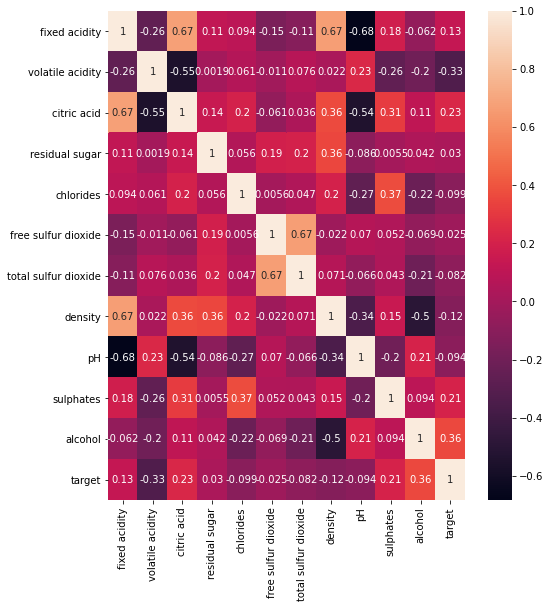

In [10]:
#heatmap correlation

import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
target                     AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

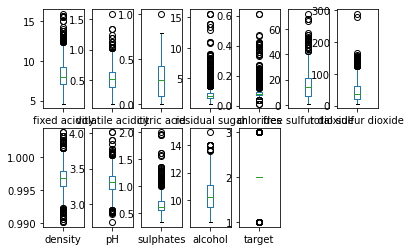

In [11]:
# checking outliers

df.plot.box(subplots=True,layout=(2,7))

In [12]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(1599, 12)
(1458, 12)


In [13]:
df=df_new
df.shape

(1458, 12)

In [14]:
#splitting the data for training and test

x=df.drop(columns=['target'])
y=df['target']

In [15]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [16]:
#x['residual sugar']=np.log1p(x['residual sugar'])
#x['chlorides']=np.log1p(x['chlorides'])
#x['total sulfur dioxide']=np.log1p(x['total sulfur dioxide'])

In [17]:
# treating skewness using log

for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log(x[col])

In [18]:
#again checking the skewness
x.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.588835
dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [20]:
print(x.shape)
print(y.shape)


(1458, 11)
(1458,)


In [21]:
# sending data to model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [22]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Maximimum Accuracy Score is 0.8909657320872274 at 48


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=48)

In [24]:
# testing other models too


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model=[SVC(),SVC(kernel='linear'),SVC(kernel='poly'),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),DecisionTreeClassifier(criterion='entropy')]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of SVC() is:
0.8878504672897196
[[  0  11   0]
 [  0 267   1]
 [  0  24  18]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.88      1.00      0.94       268
           3       0.95      0.43      0.59        42

    accuracy                           0.89       321
   macro avg       0.61      0.47      0.51       321
weighted avg       0.86      0.89      0.86       321



Accuracy Score of SVC(kernel='linear') is:
0.8348909657320872
[[  0  11   0]
 [  0 268   0]
 [  0  42   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.83      1.00      0.91       268
           3       0.00      0.00      0.00        42

    accuracy                           0.83       321
   macro avg       0.28      0.33      0.30       321
weighted avg       0.70      0.83      0.76       321



Accuracy Score of SVC(kernel='pol

In [25]:
# applying some ensemble techniques too

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 



Accuracy Score of RandomForestClassifier() is:
0.9096573208722741
[[  0  11   0]
 [  0 264   4]
 [  0  14  28]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.91      0.99      0.95       268
           3       0.88      0.67      0.76        42

    accuracy                           0.91       321
   macro avg       0.60      0.55      0.57       321
weighted avg       0.88      0.91      0.89       321



Accuracy Score of AdaBoostClassifier() is:
0.8130841121495327
[[  2   9   0]
 [ 10 238  20]
 [  0  21  21]]
              precision    recall  f1-score   support

           1       0.17      0.18      0.17        11
           2       0.89      0.89      0.89       268
           3       0.51      0.50      0.51        42

    accuracy                           0.81       321
   macro avg       0.52      0.52      0.52       321
weighted avg       0.81      0.81      0.81       321



Accuracy Score

In [26]:
rf=RandomForestClassifier(n_estimators=100,random_state=48)   #estimator is 100 by default can change it 50,100,150...
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.9096573208722741
[[  0  11   0]
 [  0 264   4]
 [  0  14  28]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.91      0.99      0.95       268
           3       0.88      0.67      0.76        42

    accuracy                           0.91       321
   macro avg       0.60      0.55      0.57       321
weighted avg       0.88      0.91      0.89       321



In [27]:
#cross validation

from sklearn.model_selection import cross_val_score

rfscores=cross_val_score(rf,x,y,cv=10)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.8630137  0.85616438 0.84931507 0.82876712 0.8630137  0.84246575
 0.80136986 0.85616438 0.82758621 0.85517241]
0.8443032593292396 0.018687628731085756


In [28]:
# saving the best model that is random forest classifier

import joblib
joblib.dump(rf,'rffile_wine_project3.obj')

['rffile_wine_project3.obj']